# <span style="color: yellow; font-weight: bold;">1.Project Title: [Data Classificcation]</span>
___

#### a. Introduction

- **Objective:** Clearly state the goal of your project. What problem are you trying to solve?
- **Background:** Provide context on why this problem is important or interesting. Mention any relevant research, datasets, or industry relevance.
- **Scope:** Define the boundaries of your project. What will be included, and what will be out of scope?

#### b. Project Overview

- **Project Summary:** A brief overview of the project, including the main steps you will take to achieve the objective.
- **Milestones:** Outline the key milestones or phases of the project. For example:
  - Data Collection
  - Data Preprocessing
  - Model Selection
  - Model Training and Evaluation
  - Results and Conclusion


#### c. About the Author

- **Name:** [Ahmed Ferganey]
- **Background:** Junior Data Scientist and Machine Learning Engineer with a strong foundation in embedded systems, industrial engineering, and supply chain management. Knowledgeable in statistical analysis, NLP, Computer Vision, and deep learning, with hands-on experience in Python, SQL, and Docker.
- **Motivation:** Why are you interested in this project? What do you hope to learn or achieve?
- **Contact:** [LinkedIn acc](https://www.linkedin.com/in/ahmed-ferganey/)



#### d. Tools and Technologies

- **Programming Languages:** List the programming languages you will use (e.g., Python).
- **Libraries and Frameworks:** List the specific libraries and frameworks you will use (e.g., TensorFlow, scikit-learn).
- **Software and Tools:** Mention any software or tools necessary for the project (e.g., Jupyter Notebook, Git).

#### e. Dataset Description

- **Dataset Name:** [Name of the Dataset]
- **Source:** Where did you obtain the dataset? Include a link if possible.
- **Description:** Briefly describe the dataset, including the number of features, the target variable, and any other important details.
- **Data Preprocessing:** Outline any preprocessing steps you anticipate, such as data cleaning, normalization, or feature engineering.

#### f. Methodology

- **Model Selection:** Describe the types of models you are considering and why.
- **Evaluation Metrics:** Define how you will evaluate your models' performance (e.g., accuracy, F1-score).
- **Validation Strategy:** Explain how you will validate your models, such as cross-validation or a 


# <span style="color: yellow; font-weight: bold;">**2. Importing libraries**</span>

In [237]:
import pandas as pd
import re
import spacy
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import IsolationForest
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import AgglomerativeClustering, DBSCAN
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score, silhouette_score
import scipy.cluster.hierarchy as sch
from sklearn.mixture import GaussianMixture
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import mean_squared_error
from mpl_toolkits.mplot3d import Axes3D
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import MultiComparison
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, FunctionTransformer
from pandas.plotting import scatter_matrix
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
import joblib 
import statsmodels.formula.api as smf


# <span style="color: red; font-weight: bold;">**3. Preprocessing and Feature Extraction**</span>

In [190]:
# Load the dataset
path = '/media/ahmed-ferganey/AI4/05-InterviewQuestions/Dataset/CAR_DETAILS_FROM_CAR_DEKHO.csv'  # Replace with the actual dataset URL or path
OriginalData = pd.read_csv(path)

In [191]:
OriginalData

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


In [192]:
OriginalData.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [193]:
for i in range(120000, 400000, 35000):
    count = OriginalData[OriginalData['km_driven'] >= i].shape[0]
    print(f"km_driven >= {i}: {count}")

km_driven >= 120000: 522
km_driven >= 155000: 161
km_driven >= 190000: 85
km_driven >= 225000: 36
km_driven >= 260000: 19
km_driven >= 295000: 15
km_driven >= 330000: 7
km_driven >= 365000: 4


In [194]:
for i in range(1, 20000, 1000):
    count = OriginalData[OriginalData['km_driven'] <= i].shape[0]
    print(f"km_driven <= {i}: {count}")

km_driven <= 1: 1
km_driven <= 1001: 24
km_driven <= 2001: 52
km_driven <= 3001: 61
km_driven <= 4001: 73
km_driven <= 5001: 116
km_driven <= 6001: 130
km_driven <= 7001: 137
km_driven <= 8001: 168
km_driven <= 9001: 175
km_driven <= 10001: 261
km_driven <= 11001: 289
km_driven <= 12001: 323
km_driven <= 13001: 338
km_driven <= 14001: 359
km_driven <= 15001: 443
km_driven <= 16001: 450
km_driven <= 17001: 460
km_driven <= 18001: 466
km_driven <= 19001: 483


In [195]:
# Predefined list of car brands for better accuracy
car_brands = ['maruti', 'hyundai', 'datsun', 'honda', 'tata', 'chevrolet', 'toyota', 'jaguar', 'mercedesbenz', 
              'ford', 'mahindra', 'volkswagen', 'audi', 'skoda', 'jeep', 'bmw', 'nissan', 'renault', 'fiat', 
              'volvo', 'mitsubishi', 'land rover', 'mg', 'ambassador', 'kia']

# Function to preprocess text
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    return text

# Function to extract brand name from the car name
def extract_brand(name):
    name_parts = name.split()  # Split the name into parts (words)
    # Check if the first word (or first two words) match any known brands
    for i in range(1, 3):  # Check first one and two words (to handle names like 'Mercedes-Benz')
        potential_brand = ' '.join(name_parts[:i]).lower()
        if potential_brand in car_brands:
            return potential_brand.capitalize()  # Return brand name with capitalized first letter
    return 'Unknown'  # Return 'Unknown' if no match is found

# Function to apply preprocessing
def preprocess_data(df):
    df['processed_name'] = df['name'].apply(preprocess_text)
    df['car_brand'] = df['processed_name'].apply(extract_brand)
    return df

In [196]:
# get all unique values from the OriginalData['name'] column
unique_values = OriginalData['name'].unique()

# Display the unique values
print(unique_values)

# Get the length of the unique values
length_of_unique_values = len(unique_values)

# Display the length
print('length_of_unique_values= ' ,length_of_unique_values)

['Maruti 800 AC' 'Maruti Wagon R LXI Minor' 'Hyundai Verna 1.6 SX' ...
 'Mahindra Verito 1.5 D6 BSIII'
 'Toyota Innova 2.5 VX (Diesel) 8 Seater BS IV'
 'Hyundai i20 Magna 1.4 CRDi']
length_of_unique_values=  1491


In [197]:
# Function to preprocess text
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    return text

# Apply preprocessing
OriginalData['processed_name'] = OriginalData['name'].apply(preprocess_text)

OriginalData['processed_name']

0                          maruti 800 ac
1               maruti wagon r lxi minor
2                    hyundai verna 16 sx
3                 datsun redigo t option
4                   honda amaze vx idtec
                      ...               
4335    hyundai i20 magna 14 crdi diesel
4336           hyundai i20 magna 14 crdi
4337                 maruti 800 ac bsiii
4338     hyundai creta 16 crdi sx option
4339                    renault kwid rxt
Name: processed_name, Length: 4340, dtype: object

In [198]:
OriginalData['processed_name']

0                          maruti 800 ac
1               maruti wagon r lxi minor
2                    hyundai verna 16 sx
3                 datsun redigo t option
4                   honda amaze vx idtec
                      ...               
4335    hyundai i20 magna 14 crdi diesel
4336           hyundai i20 magna 14 crdi
4337                 maruti 800 ac bsiii
4338     hyundai creta 16 crdi sx option
4339                    renault kwid rxt
Name: processed_name, Length: 4340, dtype: object

In [199]:
# get all unique values from the OriginalData['name'] column
unique_values = OriginalData['processed_name'].unique()

# Convert to list (optional, unique_values is already a numpy array)
unique_values_list = unique_values.tolist()

# Display the unique values
print("Unique values:", unique_values_list)


# Get the length of the unique values
length_of_unique_values = len(unique_values)

# Display the length
print('length_of_unique_values= ' ,length_of_unique_values)

Unique values: ['maruti 800 ac', 'maruti wagon r lxi minor', 'hyundai verna 16 sx', 'datsun redigo t option', 'honda amaze vx idtec', 'maruti alto lx bsiii', 'hyundai xcent 12 kappa s', 'tata indigo grand petrol', 'hyundai creta 16 vtvt s', 'maruti celerio green vxi', 'chevrolet sail 12 base', 'toyota corolla altis 18 vl cvt', 'maruti ciaz vxi plus', 'hyundai venue sx opt diesel', 'chevrolet enjoy tcdi ltz 7 seater', 'jaguar xf 22 litre luxury', 'mercedesbenz new cclass 220 cdi at', 'maruti vitara brezza zdi plus amt', 'audi q5 20 tdi', 'honda city v mt', 'tata tigor 12 revotron xt', 'audi a6 20 tdi  design edition', 'mercedesbenz new cclass c 220 cdi avantgarde', 'skoda superb ambition 20 tdi cr at', 'toyota corolla altis g at', 'toyota innova 25 g diesel 7 seater', 'jeep compass 14 sport plus bsiv', 'mercedesbenz eclass e 200 cgi elegance', 'hyundai i10 magna 11l', 'bmw 3 series 320d sport line', 'audi q7 35 tdi quattro premium', 'hyundai elantra crdi s', 'mahindra scorpio 199 s10', 

In [200]:
# Predefined list of car brands for better accuracy
car_brands = ['maruti', 'hyundai', 'datsun', 'honda', 'tata', 'chevrolet', 'toyota', 'jaguar', 'mercedesbenz', 'ford' ,
              'mahindra','volkswagen', 'audi', 'skoda', 'jeep', 'bmw', 'nissan', 'renault', 'fiat', 'volvo', 'mitsubishi', 
              'mitsubishi', 'land rover', 'mg', 'ambassador', 'kia']

# Function to extract brand name from the car name
def extract_brand(name):
    name_parts = name.split()  # Split the name into parts (words)
    
    # Check if the first word (or first two words) match any known brands
    for i in range(1, 3):  # Check first one and two words (to handle names like 'Mercedes-Benz')
        potential_brand = ' '.join(name_parts[:i]).lower()
        if potential_brand in car_brands:
            return potential_brand.capitalize()  # Return brand name with capitalized first letter
    return None  # Return None if no match is found


In [201]:
# Apply the function to the 'processed_name' column in the OriginalData DataFrame
OriginalData['BrandName'] = OriginalData['processed_name'].apply(extract_brand)


In [202]:
OriginalData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            4340 non-null   object
 1   year            4340 non-null   int64 
 2   selling_price   4340 non-null   int64 
 3   km_driven       4340 non-null   int64 
 4   fuel            4340 non-null   object
 5   seller_type     4340 non-null   object
 6   transmission    4340 non-null   object
 7   owner           4340 non-null   object
 8   processed_name  4340 non-null   object
 9   BrandName       4335 non-null   object
dtypes: int64(3), object(7)
memory usage: 339.2+ KB


In [203]:
# Removing duplication rows
#######################################

# Check for missing values
print(OriginalData.isnull().sum())

#######################################

duplicates = OriginalData.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

#######################################

# Remove duplicate rows
cleaned_data_no_duplication_V1 = OriginalData.drop_duplicates()

# Check the number of rows after removing duplicates
print(f"Number of rows after removing duplicates: {cleaned_data_no_duplication_V1.shape[0]}")

# Verify no duplicates remain
duplicates_after = cleaned_data_no_duplication_V1.duplicated().sum()
print(f"Number of duplicate rows after cleaning: {duplicates_after}")


# Drop the specified columns
cleaned_data_no_duplication_V1 = cleaned_data_no_duplication_V1.drop(columns=['name', 'processed_name'])

# Remove rows with any null values
cleaned_data_no_duplication_V1 = cleaned_data_no_duplication_V1.dropna()


# Save cleaned data to a CSV file
cleaned_data_no_duplication_V1.to_csv('cleaned_data_no_duplication_V1.csv', index=False)

#######################################

name              0
year              0
selling_price     0
km_driven         0
fuel              0
seller_type       0
transmission      0
owner             0
processed_name    0
BrandName         5
dtype: int64
Number of duplicate rows: 763
Number of rows after removing duplicates: 3577
Number of duplicate rows after cleaning: 0


In [204]:
# Reset the index of the DataFrame and drop the old index
cleaned_data_no_duplication_V1 = cleaned_data_no_duplication_V1.reset_index(drop=True)
cleaned_data_no_duplication_V1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3572 entries, 0 to 3571
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   year           3572 non-null   int64 
 1   selling_price  3572 non-null   int64 
 2   km_driven      3572 non-null   int64 
 3   fuel           3572 non-null   object
 4   seller_type    3572 non-null   object
 5   transmission   3572 non-null   object
 6   owner          3572 non-null   object
 7   BrandName      3572 non-null   object
dtypes: int64(3), object(5)
memory usage: 223.4+ KB


In [205]:
cleaned_data_no_duplication_V1

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,BrandName
0,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti
1,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti
2,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai
3,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Honda
...,...,...,...,...,...,...,...,...
3567,2014,409999,80000,Diesel,Individual,Manual,Second Owner,Hyundai
3568,2014,409999,80000,Diesel,Individual,Manual,Second Owner,Hyundai
3569,2009,110000,83000,Petrol,Individual,Manual,Second Owner,Maruti
3570,2016,865000,90000,Diesel,Individual,Manual,First Owner,Hyundai


#### **Pipeline steps**

In [207]:
# functions definition

# Define log transformation function
def log_transform(x):
    return np.log1p(x)

In [208]:
categorical_features = ['fuel', 'seller_type', 'transmission', 'owner'] 


In [157]:
# # Step 1:# Pipeline for text preprocessing and brand extraction
# text_preprocessing_pipeline = Pipeline(steps=[
#     ('preprocess', FunctionTransformer(preprocess_data, validate=False))
# ])

# # Step 2: Preprocessing (Log transform, scaling, and One-hot encoding for numerical and categorical data)
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('text', text_preprocessing_pipeline, 'name'),  # Text preprocessing for the 'name' column
#         ('num_km', Pipeline(steps=[
#             ('log', FunctionTransformer(func=log_transform, validate=False)),  # Log transformation for `km_driven`
#             ('scaler', StandardScaler())  # Scaling numerical data
#         ]), ['km_driven']),  # Apply only to `km_driven`
#         ('num_year', StandardScaler(), ['year']),  # Scaling for `year`
#         ('cat', OneHotEncoder(), categorical_features)  # One-hot encoding for categorical data
#     ])

# # Step 3: Full pipeline (preprocessing, PCA, clustering, and classification)
# full_pipeline = Pipeline(steps=[
#     ('preprocessor', preprocessor)])    # Preprocessing step

# """
#     ('pca', PCA(n_components=2)),  # Dimensionality reduction
#     ('clustering', KMeans(n_clusters=5)),  # Clustering
#     ('classifier', LogisticRegression())  # Classification model
# """

# # Apply the pipeline to the data
# processed_data = full_pipeline.fit_transform(OriginalData)    

# <span style="color: gray; font-weight: bold;">**3. Statistics and Feature Selection**</span>

In [209]:
cleaned_data_no_duplication_V1

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,BrandName
0,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti
1,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti
2,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai
3,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Honda
...,...,...,...,...,...,...,...,...
3567,2014,409999,80000,Diesel,Individual,Manual,Second Owner,Hyundai
3568,2014,409999,80000,Diesel,Individual,Manual,Second Owner,Hyundai
3569,2009,110000,83000,Petrol,Individual,Manual,Second Owner,Maruti
3570,2016,865000,90000,Diesel,Individual,Manual,First Owner,Hyundai


In [214]:
# Log transformation to handle right-skewness in the selling_price column
cleaned_data_no_duplication_V1['log_SellingPrice'] = np.log(cleaned_data_no_duplication_V1['selling_price'] + 1)  # Add 1 to avoid log(0)

# Drop the original selling_price column as it's no longer needed
cleaned_data_no_duplication_V1 = cleaned_data_no_duplication_V1.drop('selling_price', 'is_outlier', axis=1)


In [217]:
cleaned_data_no_duplication_V1

,year,km_driven,fuel,seller_type,transmission,owner,BrandName,log_SellingPrice
0,2007,70000,Petrol,Individual,Manual,First Owner,Maruti,11.002117
1,2007,50000,Petrol,Individual,Manual,First Owner,Maruti,11.813037
2,2012,100000,Diesel,Individual,Manual,First Owner,Hyundai,13.304687
3,2017,46000,Petrol,Individual,Manual,First Owner,Datsun,12.429220
4,2014,141000,Diesel,Individual,Manual,Second Owner,Honda,13.017005
...,...,...,...,...,...,...,...,...
3567,2014,80000,Diesel,Individual,Manual,Second Owner,Hyundai,12.923912
3568,2014,80000,Diesel,Individual,Manual,Second Owner,Hyundai,12.923912
3569,2009,83000,Petrol,Individual,Manual,Second Owner,Maruti,11.608245
3570,2016,90000,Diesel,Individual,Manual,First Owner,Hyundai,13.670486


In [211]:
# Define the function to count outliers based on IQR
def count_outliers(data, var, target):
    Q1 = data.groupby(var)[target].quantile(0.25)
    Q3 = data.groupby(var)[target].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Count outliers
    outliers = pd.Series(0, index=data.index)
    for category in data[var].unique():
        outliers += ((data[var] == category) & ((data[target] < lower_bound[category]) | (data[target] > upper_bound[category])))
    
    return outliers.sum()


# Define the function to flag outliers based on IQR
def flag_outliers(data, var, target):
    Q1 = data.groupby(var)[target].quantile(0.25)
    Q3 = data.groupby(var)[target].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Create a boolean series to flag outliers
    outliers = pd.Series(False, index=data.index)
    for category in data[var].unique():
        outliers |= (data[var] == category) & ((data[target] < lower_bound[category]) | (data[target] > upper_bound[category]))
    
    return outliers    

Total unique outliers across all categories: 97


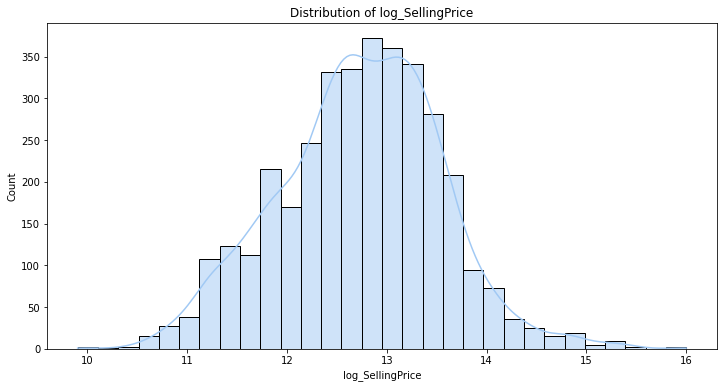

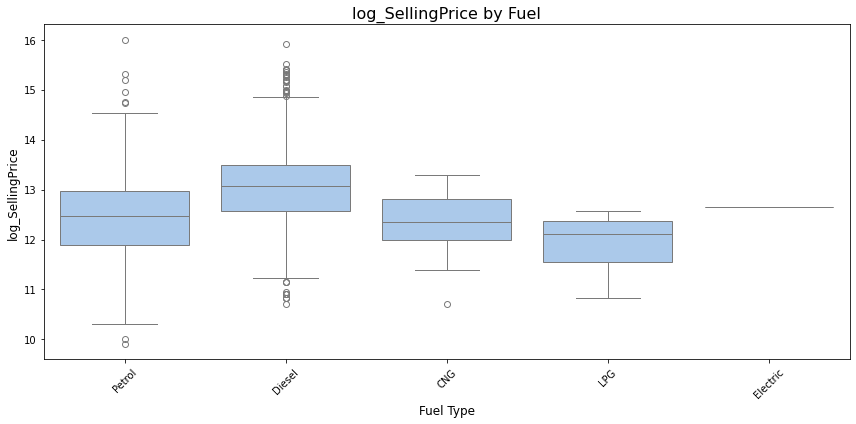

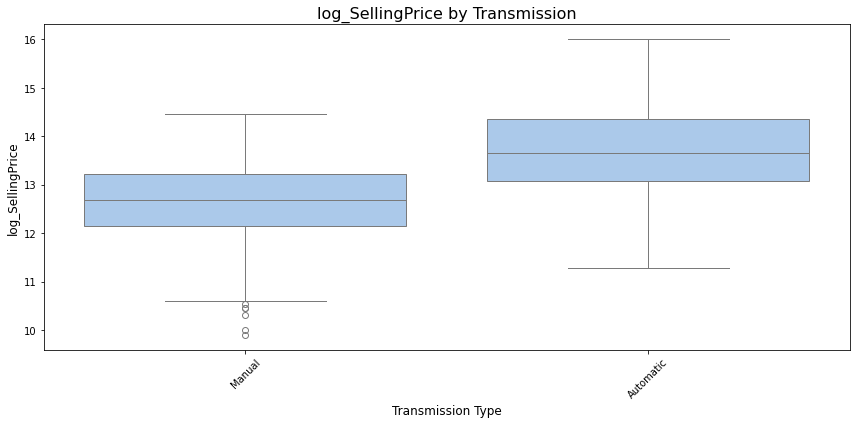

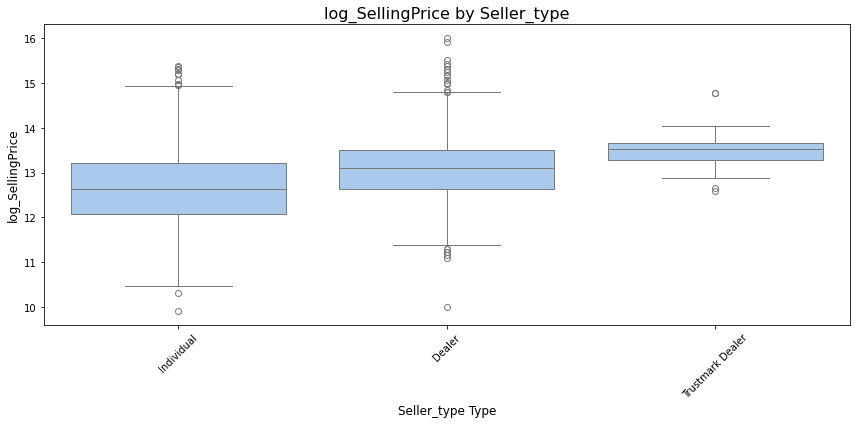

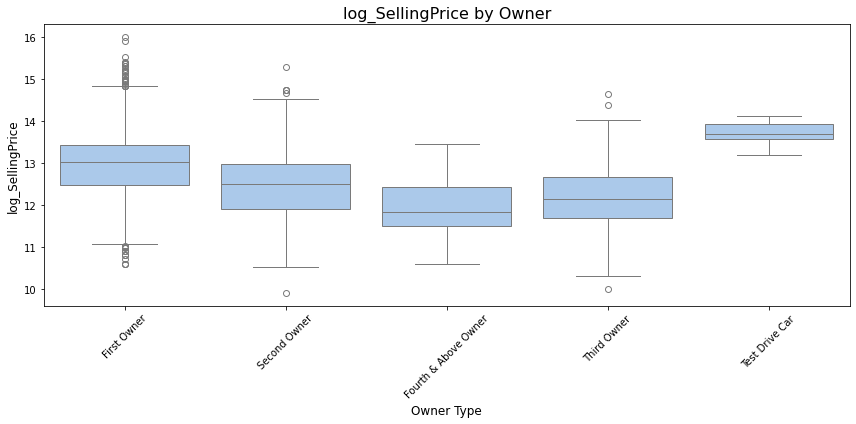

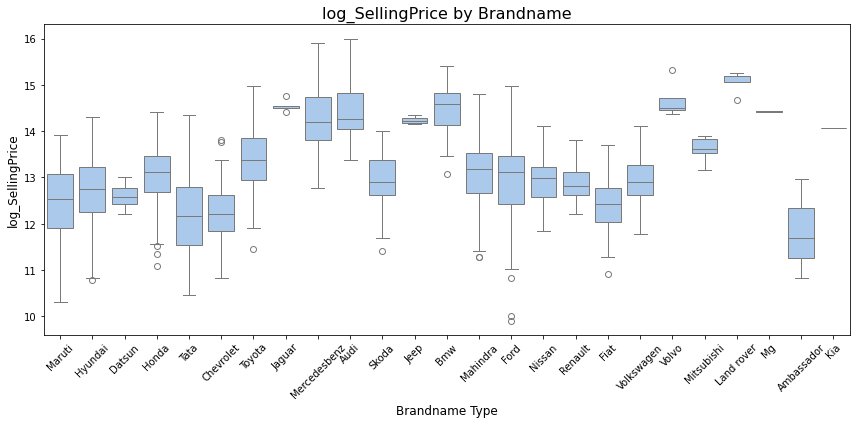

In [218]:
# Set a broader color palette
sns.set_palette("pastel")

# List of categorical variables to plot
categorical_vars = ['fuel', 'transmission', 'seller_type', 'owner', 'BrandName']

# Create an outlier flag for each variable and combine them
cleaned_data_no_duplication_V1.loc[:, 'is_outlier'] = False
for var in categorical_vars:
    outlier_flags = flag_outliers(cleaned_data_no_duplication_V1, var, 'log_SellingPrice')
    cleaned_data_no_duplication_V1.loc[:, 'is_outlier'] |= outlier_flags

# Count total unique outliers
total_unique_outliers = cleaned_data_no_duplication_V1['is_outlier'].sum()
print(f"Total unique outliers across all categories: {total_unique_outliers}")

# Visualize continuous variables (histogram and boxplot)
plt.figure(figsize=(12, 6))
sns.histplot(cleaned_data_no_duplication_V1['log_SellingPrice'], bins=30, kde=True)
plt.title('Distribution of log_SellingPrice')
plt.show()

# Create boxplots in a loop and show outliers
for var in categorical_vars:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=var, y='log_SellingPrice', data=cleaned_data_no_duplication_V1, showfliers=True)  # Show outliers
    plt.title(f"log_SellingPrice by {var.capitalize()}", fontsize=16)
    plt.xlabel(var.capitalize() + ' Type', fontsize=12)
    plt.ylabel('log_SellingPrice', fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [220]:
# Create a DataFrame for outliers
outliers_data_V1 = cleaned_data_no_duplication_V1[cleaned_data_no_duplication_V1['is_outlier'] == True]

# Save the outliers to a CSV for further investigation
outliers_data_V1.to_csv('outliers_data_V1.csv', index=False)


In [223]:
outliers_data_V1.describe()

,year,km_driven,log_SellingPrice
count,97.000000,97.000000,97.000000
mean,2010.474227,61449.082474,12.777504
std,6.296647,38587.634553,2.038558
min,1998.000000,1500.000000,9.903538
25%,2005.000000,35000.000000,10.915107
50%,2011.000000,57000.000000,11.407576
75%,2017.000000,80000.000000,14.930652
max,2020.000000,195000.000000,16.001562


In [222]:
cleaned_data_no_duplication_V1.describe()

,year,km_driven,log_SellingPrice
count,3572.000000,3572.000000,3572.000000
mean,2012.969485,69263.349944,12.731283
std,4.243290,47603.846430,0.815875
min,1992.000000,1.000000,9.903538
25%,2010.000000,36000.000000,12.206078
50%,2013.000000,60104.000000,12.765691
75%,2016.000000,90000.000000,13.304687
max,2020.000000,806599.000000,16.001562


In [225]:
cleaned_data_no_duplication_V1 = cleaned_data_no_duplication_V1.drop('is_outlier', axis=1)


In [226]:
cleaned_data_no_duplication_V1

,year,km_driven,fuel,seller_type,transmission,owner,BrandName,log_SellingPrice
0,2007,70000,Petrol,Individual,Manual,First Owner,Maruti,11.002117
1,2007,50000,Petrol,Individual,Manual,First Owner,Maruti,11.813037
2,2012,100000,Diesel,Individual,Manual,First Owner,Hyundai,13.304687
3,2017,46000,Petrol,Individual,Manual,First Owner,Datsun,12.429220
4,2014,141000,Diesel,Individual,Manual,Second Owner,Honda,13.017005
...,...,...,...,...,...,...,...,...
3567,2014,80000,Diesel,Individual,Manual,Second Owner,Hyundai,12.923912
3568,2014,80000,Diesel,Individual,Manual,Second Owner,Hyundai,12.923912
3569,2009,83000,Petrol,Individual,Manual,Second Owner,Maruti,11.608245
3570,2016,90000,Diesel,Individual,Manual,First Owner,Hyundai,13.670486


#### **One-Way ANOVA**

In [227]:

# Test whether selling prices differ across fuel categories
fuel_groups = [cleaned_data_no_duplication_V1[cleaned_data_no_duplication_V1['fuel'] == fuel]['log_SellingPrice'] for fuel in cleaned_data_no_duplication_V1['fuel'].unique()]
anova_result = stats.f_oneway(*fuel_groups)

print(f"ANOVA Test Result: F-statistic={anova_result.statistic}, p-value={anova_result.pvalue}")


ANOVA Test Result: F-statistic=154.27083543459685, p-value=6.762038794339543e-122


Skipping KDE for Electric due to zero variance.


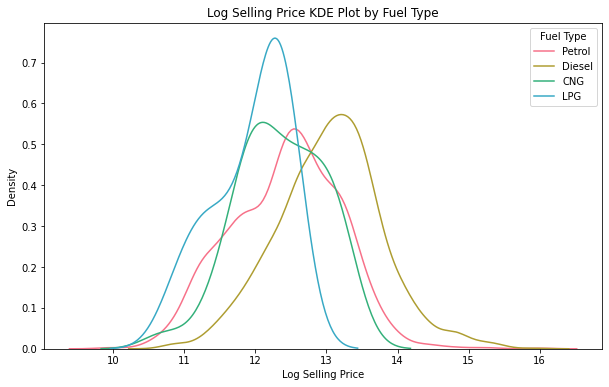

In [231]:
# Set up a color palette with unique colors for each fuel type
colors = sns.color_palette("husl", len(cleaned_data_no_duplication_V1['fuel'].unique()))

# KDE plot for log selling price per fuel type with different colors
plt.figure(figsize=(10, 6))

# Loop through fuel types and assign a unique color from the palette
for i, fuel_type in enumerate(cleaned_data_no_duplication_V1['fuel'].unique()):
    # Calculate variance for the current fuel type
    variance = cleaned_data_no_duplication_V1[cleaned_data_no_duplication_V1['fuel'] == fuel_type]['log_SellingPrice'].var()
    
    # Skip plotting if variance is zero
    if variance > 0:
        sns.kdeplot(
            cleaned_data_no_duplication_V1[cleaned_data_no_duplication_V1['fuel'] == fuel_type]['log_SellingPrice'], 
            label=fuel_type, 
            color=colors[i]
        )
    else:
        print(f"Skipping KDE for {fuel_type} due to zero variance.")

plt.title('Log Selling Price KDE Plot by Fuel Type')
plt.xlabel('Log Selling Price')
plt.ylabel('Density')
plt.legend(title='Fuel Type')
plt.show()

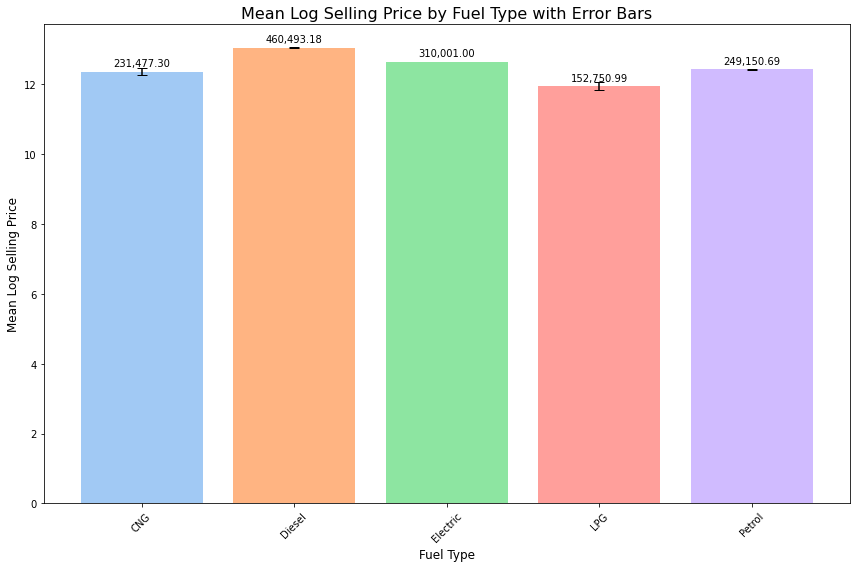

In [234]:
# Calculate mean and standard error for each fuel category
mean_prices = cleaned_data_no_duplication_V1.groupby('fuel')['log_SellingPrice'].mean()
std_errors = cleaned_data_no_duplication_V1.groupby('fuel')['log_SellingPrice'].sem()

# Create a bar plot with error bars
plt.figure(figsize=(12, 8))
bars = plt.bar(
    mean_prices.index, 
    mean_prices.values, 
    yerr=std_errors.values, 
    capsize=5, 
    color=sns.color_palette("pastel", n_colors=len(mean_prices))
)

# Add titles and labels
plt.title('Mean Log Selling Price by Fuel Type with Error Bars', fontsize=16)
plt.xlabel('Fuel Type', fontsize=12)
plt.ylabel('Mean Log Selling Price', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# Annotate bars with mean values in original scale
for bar in bars:
    height = bar.get_height()
    original_scale_value = np.exp(height)  # Convert log scale back to original scale
    plt.text(
        bar.get_x() + bar.get_width() / 2., 
        height + 0.1,  # Adjust placement for readability
        f'{original_scale_value:,.2f}',  # Format the value in original scale
        ha='center', 
        va='bottom', 
        fontsize=10
    )

plt.show()

In [235]:
# ANOVA for categorical predictors
categorical_columns = ['fuel', 'transmission', 'seller_type', 'owner', 'BrandName']

for column in categorical_columns:
    groups = [cleaned_data_no_duplication_V1[cleaned_data_no_duplication_V1[column] == category]['log_SellingPrice'] for category in cleaned_data_no_duplication_V1[column].unique()]
    anova_result = stats.f_oneway(*groups)
    print(f'ANOVA for {column}: F-statistic={anova_result.statistic}, p-value={anova_result.pvalue}')

ANOVA for fuel: F-statistic=154.27083543459685, p-value=6.762038794339543e-122
ANOVA for transmission: F-statistic=549.4222975965656, p-value=3.910180915800535e-113
ANOVA for seller_type: F-statistic=114.11550996566771, p-value=9.128882625711463e-49
ANOVA for owner: F-statistic=148.49942807727749, p-value=1.263159201566454e-117
ANOVA for BrandName: F-statistic=58.390113053276096, p-value=4.822296859784317e-235


#### **Two-Way ANOVA**

In [238]:
# Ensure the categorical variables are treated as factors
cleaned_data_no_duplication_V1['transmission'] = cleaned_data_no_duplication_V1['transmission'].astype('category')
cleaned_data_no_duplication_V1['fuel'] = cleaned_data_no_duplication_V1['fuel'].astype('category')

# Fit the Two-Way ANOVA model
model = smf.ols('log_SellingPrice ~ C(transmission) * C(fuel)', data=cleaned_data_no_duplication_V1).fit()

# Print the ANOVA table
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                               sum_sq      df            F        PR(>F)
C(transmission)             35.945007     1.0    74.487044  9.051463e-18
C(fuel)                  15271.261099     4.0  7911.468001  0.000000e+00
C(transmission):C(fuel)    210.662772     4.0   109.136486  1.328698e-67
Residual                  1720.352209  3565.0          NaN           NaN


/home/ahmed-ferganey/.local/lib/python3.10/site-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 4, but rank is 2
  warnings.warn('covariance of constraints does not have full '
/home/ahmed-ferganey/.local/lib/python3.10/site-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 4, but rank is 3
  warnings.warn('covariance of constraints does not have full '


***********Interpretation:***********

    - The p-value of C(fuel):- Fuel type has a significant effect on selling price.

    - The p-value of C(transmission):- Transmission type also has a significant effect on selling price.

    - The p-value of C(fuel):C(transmission):-  There is a significant interaction effect between fuel type and transmission type on selling price.


#### **Post-Hoc Tests**

Given that all effects are significant, we want to perform post-hoc tests (e.g., Tukey’s HSD) to determine which specific groups differ from each other.

In [239]:
# Perform Tukey's HSD test for fuel
fuel_comparison = MultiComparison(cleaned_data_no_duplication_V1['log_SellingPrice'], cleaned_data_no_duplication_V1['fuel'])
tukey_fuel = fuel_comparison.tukeyhsd()
print("Tukey's HSD for Fuel:")
print(tukey_fuel)

Tukey's HSD for Fuel:
  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
 group1   group2  meandiff p-adj   lower   upper  reject
--------------------------------------------------------
     CNG   Diesel   0.6878    0.0  0.3462  1.0295   True
     CNG Electric   0.2921 0.9955 -1.7926  2.3768  False
     CNG      LPG  -0.4157 0.2432 -0.9695  0.1381  False
     CNG   Petrol   0.0736  0.977 -0.2682  0.4154  False
  Diesel Electric  -0.3957 0.9849 -2.4534  1.6619  False
  Diesel      LPG  -1.1035    0.0 -1.5447 -0.6622   True
  Diesel   Petrol  -0.6142    0.0 -0.6837 -0.5448   True
Electric      LPG  -0.7078 0.8899 -2.8111  1.3955  False
Electric   Petrol  -0.2185 0.9985 -2.2762  1.8392  False
     LPG   Petrol   0.4892 0.0211  0.0479  0.9306   True
--------------------------------------------------------


# <span style="color: green; font-weight: bold;">**5. Dimensionality Reduction**</span>

# <span style="color: #33FFF8; font-weight: bold;">**6. Clustering**</span>

# <span style="color: #F333FF; font-weight: bold;">**7. Classification**</span>